## Step-1 : Import necessary libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages
import numpy as np
import pandas as pd
from math import sqrt

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1.1 Reading the Dataset

In [3]:
df_bike = pd.read_csv("day.csv")

### 1.2 Inspection of Dataset

In [4]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Shape of the Dataset
df_bike.shape

(730, 16)

In [6]:
# Checking the Data types
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Summary the numerical columns
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Checkin the Missing values in the dataset
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Step 2: Encoding & Visualising the Data

### 2.1 Encoding Categorical Columns

In [9]:
#Converting season
df_bike.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
df_bike.season.value_counts()


Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [10]:
#Converting mnth
df_bike.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
df_bike.mnth.value_counts()

Jan    62
Aug    62
Dec    62
Jul    62
Oct    62
Mar    62
May    62
Nov    60
Sep    60
Apr    60
Jun    60
Feb    56
Name: mnth, dtype: int64

In [11]:
#Converting weathersit
df_bike.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
df_bike.weathersit.value_counts()

Clear             463
Misty             246
Light_rainsnow     21
Name: weathersit, dtype: int64

In [12]:
#Converting weathersit
df_bike.weekday.replace((0,1,2,3,4,5,6), ('Sun','Mon','Tues','Wed','Thurs','Fri','Sat'), inplace=True)
df_bike.weekday.value_counts()

Tues     105
Mon      105
Thurs    104
Wed      104
Fri      104
Sun      104
Sat      104
Name: weekday, dtype: int64

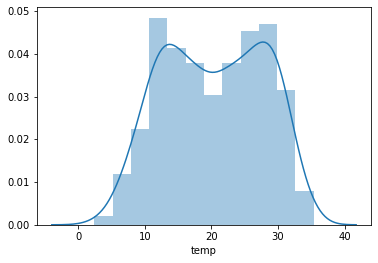

In [13]:
sns.distplot(df_bike['temp'])
plt.show()

##### Inference:
- Most of the bike rented when the temperature is in the range of 10 degree to 30 degree
- Mostly people rent bikes on the pleasant temperature 

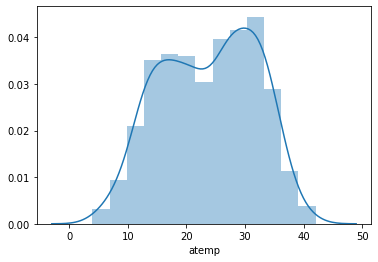

In [14]:
sns.distplot(df_bike['atemp'])
plt.show()

##### Inference:
- Bike renting drastically decrease with temperature going above 32 degrees.

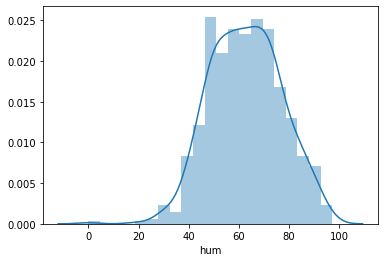

In [15]:
sns.distplot(df_bike['hum'])
plt.show()

##### Inference:
- With increase in humidity number of bike rented decreases.

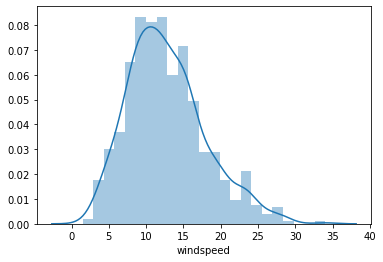

In [16]:
sns.distplot(df_bike['windspeed'])
plt.show()

##### Inference:
- With increase in windspeed number of bike rented decreases.

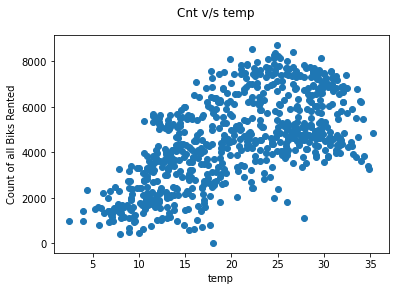

In [17]:
plt.scatter(x='temp',y='cnt',data=df_bike)
plt.suptitle('Cnt v/s temp')
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')
plt.show()

##### Inference:
- Above scatter plot show that there is some linear relation with "cnt" and "temp"

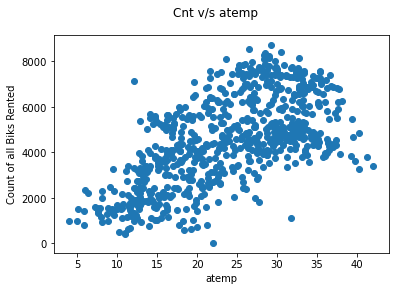

In [18]:
plt.scatter(x='atemp',y='cnt',data=df_bike)
plt.suptitle('Cnt v/s atemp')
plt.xlabel('atemp')
plt.ylabel('Count of all Biks Rented')
plt.show()

##### Inference:
- Above show similar kind of linear relation with "cnt" of "atemp" as "temp"

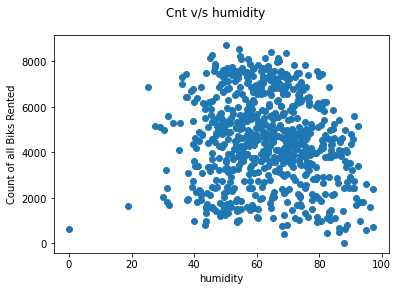

In [19]:
plt.scatter(x='hum',y='cnt',data=df_bike)
plt.suptitle('Cnt v/s humidity')
plt.xlabel('humidity')
plt.ylabel('Count of all Biks Rented')
plt.show()

##### Inference:
- Above scatter plot shows that most of the bikes are rented when the humidity is between 40  to 95

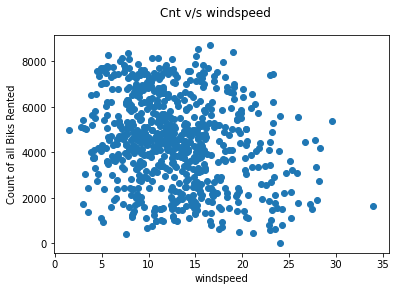

In [20]:
plt.scatter(x='windspeed',y='cnt',data=df_bike)
plt.suptitle('Cnt v/s windspeed')
plt.xlabel('windspeed')
plt.ylabel('Count of all Biks Rented')
plt.show()

##### Inference:
- Above scatter plot show that most the bikes are rented when the speed is low between 5  to 25

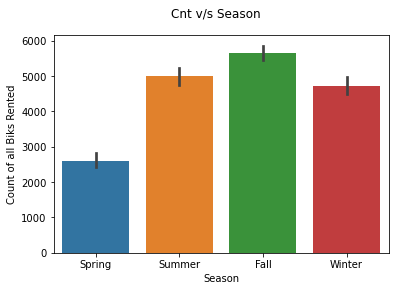

In [21]:
sns.barplot(x=df_bike['season'],y=df_bike['cnt'])
plt.suptitle('Cnt v/s Season')
plt.xlabel('Season')
plt.ylabel('Count of all Biks Rented')
plt.show()

##### Inference:
- Most of the bikes are rented in fall season followed by Summer,Winter and lastly Spring.

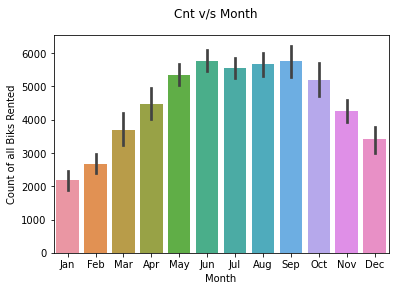

In [22]:
sns.barplot(x=df_bike['mnth'],y=df_bike['cnt'])
plt.suptitle('Cnt v/s Month')
plt.xlabel('Month')
plt.ylabel('Count of all Biks Rented')
plt.show()

##### Inference:
- Most of the bike booking was happening in the months' May to Sep with a median of over 4000 bookings per month.

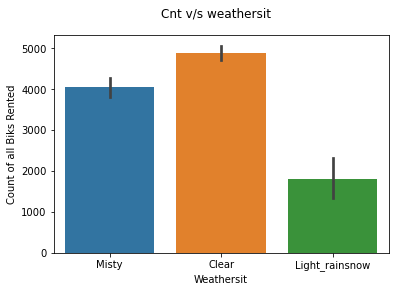

In [23]:
sns.barplot(x=df_bike['weathersit'],y=df_bike['cnt'])
plt.suptitle('Cnt v/s weathersit')
plt.xlabel('Weathersit')
plt.ylabel('Count of all Biks Rented')
plt.show()

##### Inference:
- Most of the bike booking was happening during Clear weather with a median of close to 5000 bookings (for two years). This was followed by Misty with 30% of the total booking. It indicates that the weathersit does show some trend towards the bike bookings,

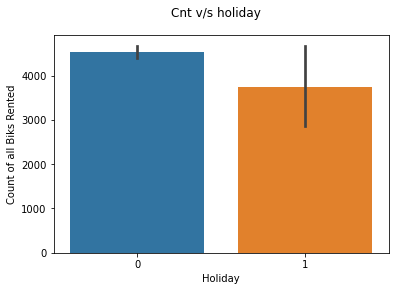

In [24]:
sns.barplot(x=df_bike['holiday'],y=df_bike['cnt'])
plt.suptitle('Cnt v/s holiday')
plt.xlabel('Holiday')
plt.ylabel('Count of all Biks Rented')
plt.show()

##### Inference:
- Most of the bikes are rented when there is no Holiday 

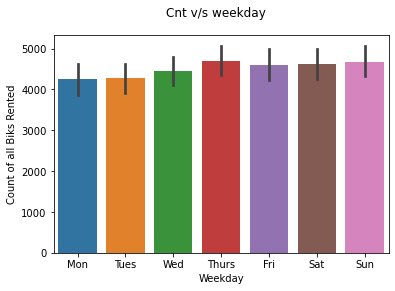

In [25]:
sns.barplot(x=df_bike['weekday'],y=df_bike['cnt'])
plt.suptitle('Cnt v/s weekday')
plt.xlabel('Weekday')
plt.ylabel('Count of all Biks Rented')
plt.show()

##### Inference:
- weekday variable shows the very close trend between all the variables. Further analysis would be needed to determine whether this attribute needs to be included in the model parameter selection

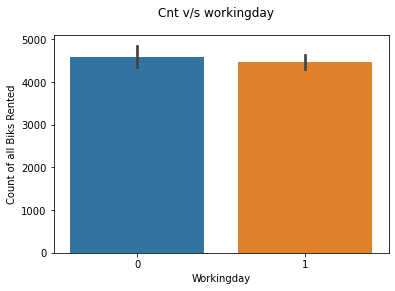

In [26]:
sns.barplot(x= df_bike['workingday'],y=df_bike['cnt'])
plt.suptitle('Cnt v/s workingday')
plt.xlabel('Workingday')
plt.ylabel('Count of all Biks Rented')
plt.show()

##### Inference:
- More bike are booked on 'workingday'

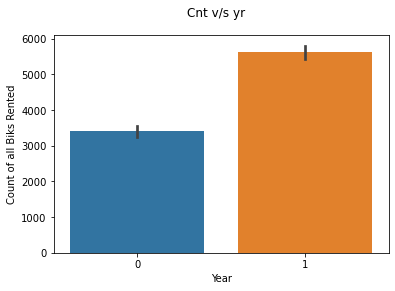

In [27]:
sns.barplot(x=df_bike['yr'],y=df_bike['cnt'])
plt.suptitle('Cnt v/s yr')
plt.xlabel('Year')
plt.ylabel('Count of all Biks Rented')
plt.show()

##### Inference:
- Bike rental demand has gone up from 2018 to 2019

### 2.4 Visualize categorical variable

In [28]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


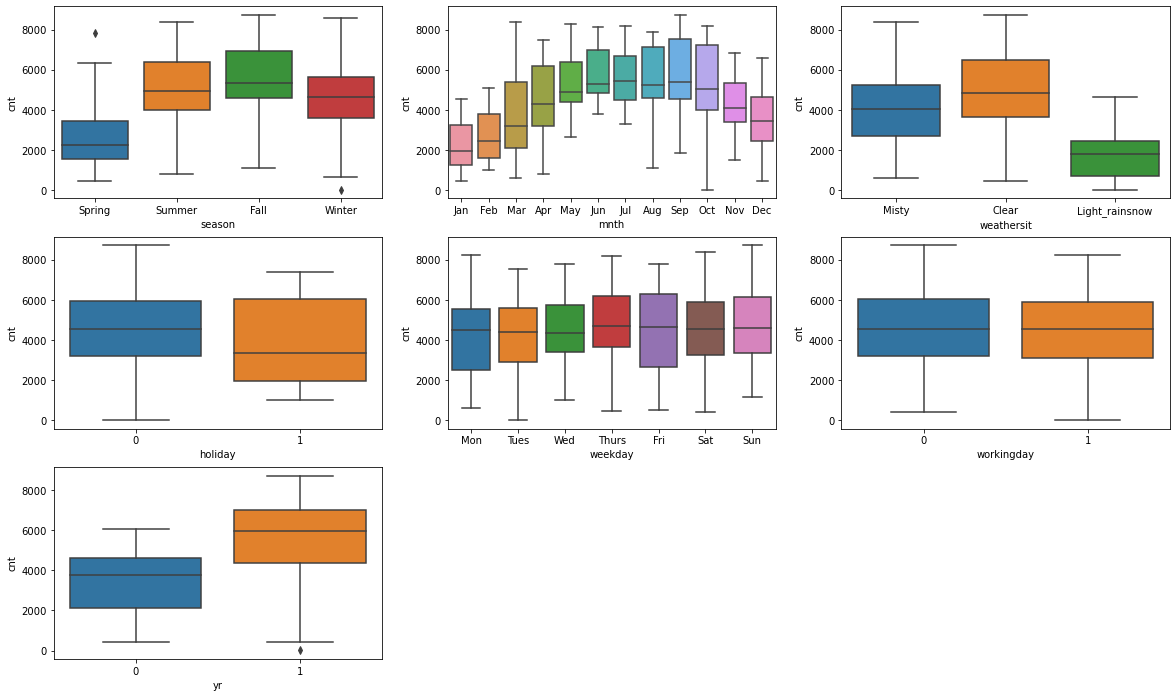

In [29]:
# visualize categorical variables
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season',y ='cnt',data = df_bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df_bike)

plt.show()


##### Inference: 
#####  There were 7 categorical variables in the dataset.
- season: Most of the bike booking were happening in Fall with a median of over 5000 booking (for the period of 2 years). This was followed by Summer & Winter. This indicates, season can be a good predictor for the dependent variable.

- mnth: Most of the bike booking were happening in the months May,June,July,August and september with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

- weathersit: Most of the bike booking were happening during "Clear" with a median of close to 5000 booking (for the period of 2 years). This was followed by Misty with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

- holiday: Major percentage of the bike booking were happening when there is no holiday which means this data is clearly biased. This indicates, holiday cannot be a good predictor for the dependent variable.

- weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

- workingday: Majority of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

- yr: Bike rental demand has gone up from 2018 to 2019

### 2.5 Visualize Numerical variable

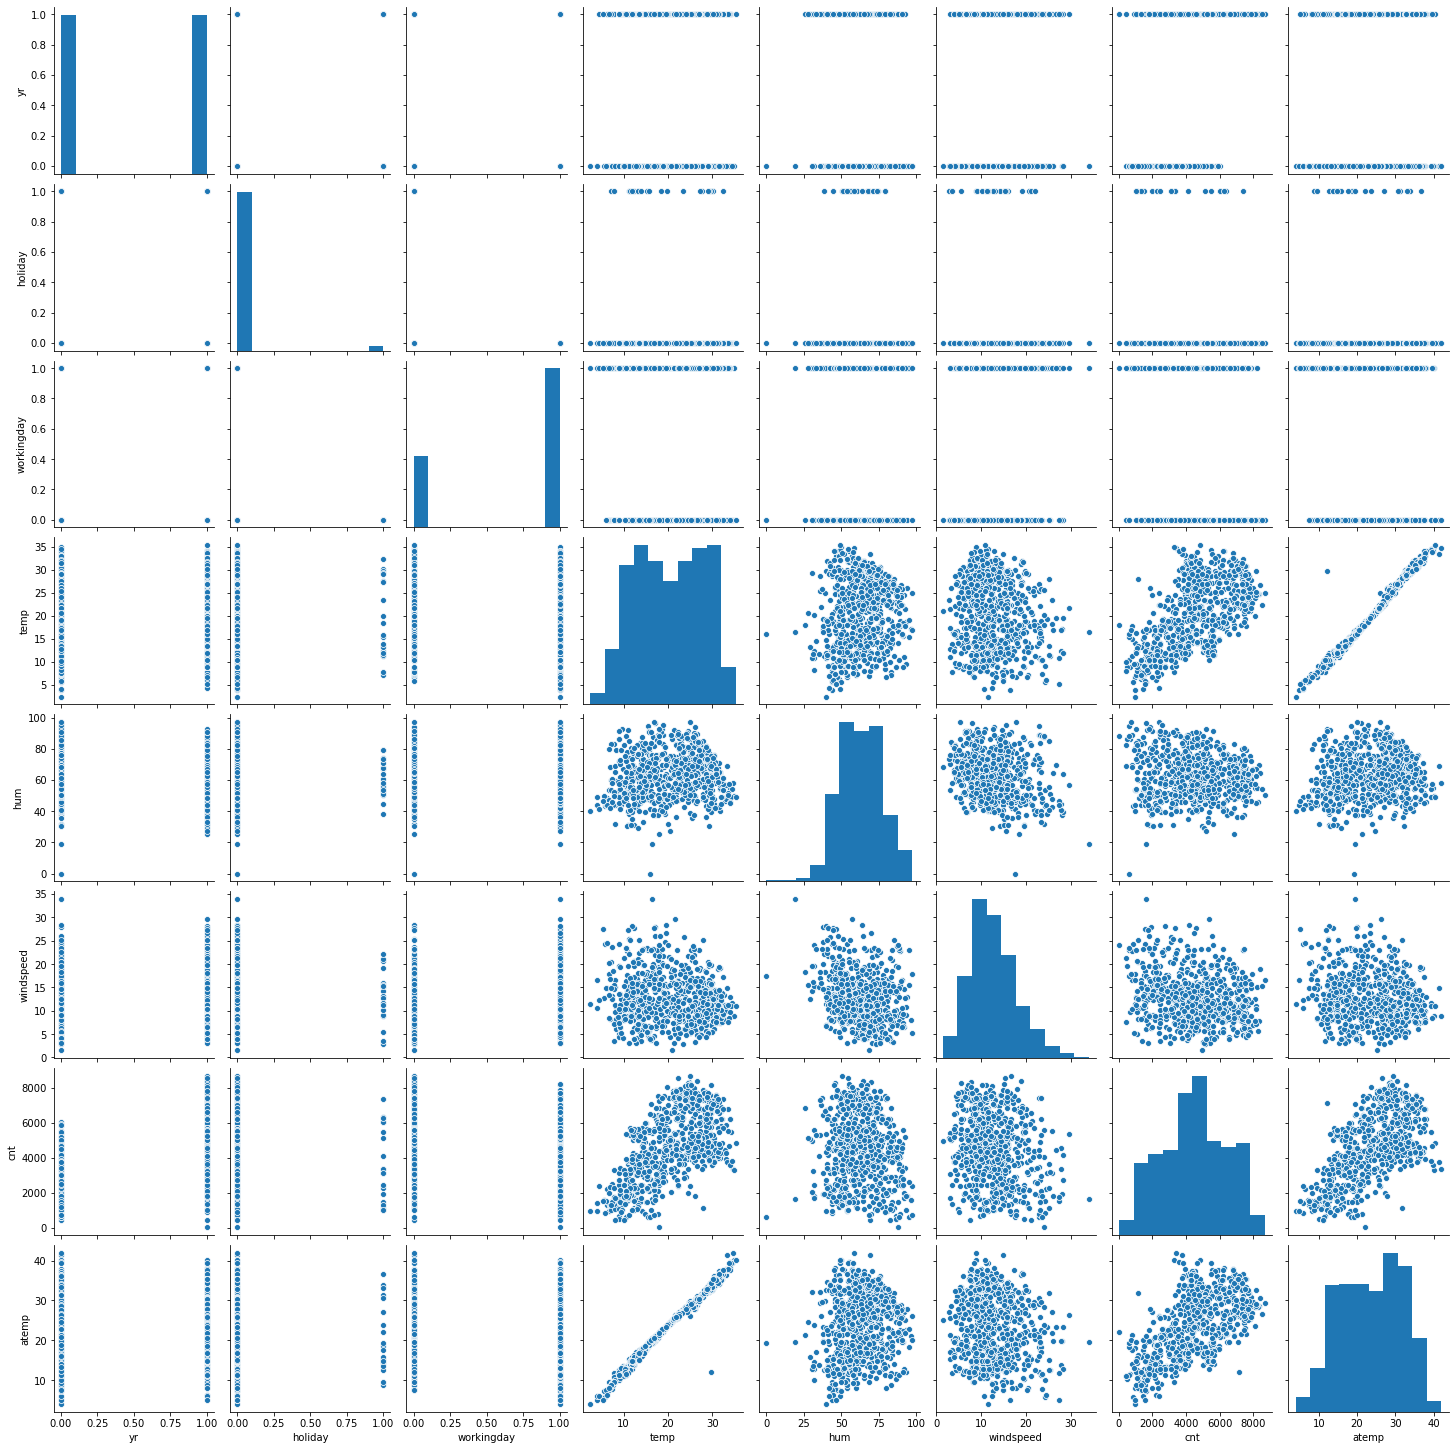

In [30]:
# Visualising the numerical variables
bike_numerical=df_bike[[ 'yr', 'holiday', 'workingday', 'temp','hum','windspeed','cnt','atemp']]

sns.pairplot(bike_numerical)
plt.show()

##### Inference:
- We can consider this model for linear regression as there is linear relation between "temp", "atemp" and "cnt"

### 2.6 Correlation Matrix Using Heatmap

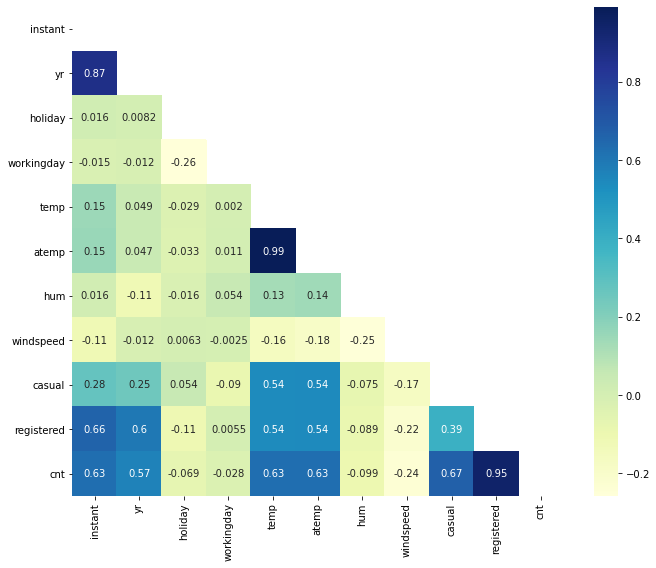

In [31]:
corr = df_bike.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='YlGnBu', annot = True)

plt.show()

##### Inference:
- "temp" and "atemp" both have the same correlation coefficient as well as they are highly correlated to each other. So,  Both of the parameters cannot be used in the model due to multicolinearity and need to drop one variable while building the model to avoid multicolinearity using VIF and p-value

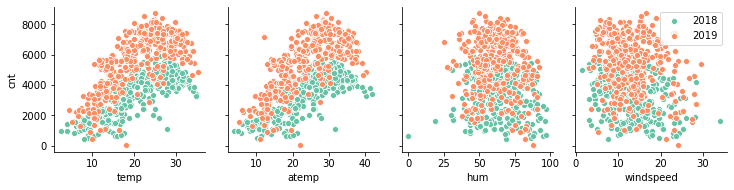

In [32]:
# Impact on year based on numerical variables
ax = sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=df_bike, hue='yr', palette='Set2')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

##### Inference:
- All the parameters have increased values in 2019 compared to 2018. Thus, year may become a key paratemeter in the model

## Step-3: Data Preparation 

### 3.1 Dummy Variables Preparation

##### Dummy Variables: 
- This a type of the approach to encode Categorical data. pandas get_dummies() method takes categorical feature as an argument. Then it creates a Dummy Variable for every label in the feature, such that each dummy variable holds data as 1 or 0. 1 indicates the presence of a particular label and 0 indicates the absence of a particular label.
- drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation. Hence it reduces the correlations created among dummy variables.

In [33]:
# Get the dummy variables for the dataset and drop the first column from status dataframe using 'drop_first = True'
bike_new_1 = pd.get_dummies(df_bike[["season","weekday","mnth","weathersit"]], drop_first = True)

# Now let's see the head of our dataframe.
bike_new_1.head()

,season_Spring,season_Summer,season_Winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,mnth_Aug,...,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Light_rainsnow,weathersit_Misty
0,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### 3.2 Merging the Dummy Variables with original dataframe 

In [34]:
# Merging the dummy variables with  original dataframe
df_bike = pd.concat([bike_new_1, df_bike], axis = 1)

df_bike.head()

,season_Spring,season_Summer,season_Winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,mnth_Aug,...,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,0,1,0,0,0,0,0,0,...,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,0,0,0,0,0,1,0,0,...,Tues,1,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,0,0,0,0,0,0,1,0,...,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,0,0,0,0,1,0,0,0,...,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,0,0,0,0,0,0,0,0,...,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [35]:
df_bike.shape

(730, 38)

In [36]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season_Spring              730 non-null    uint8  
 1   season_Summer              730 non-null    uint8  
 2   season_Winter              730 non-null    uint8  
 3   weekday_Mon                730 non-null    uint8  
 4   weekday_Sat                730 non-null    uint8  
 5   weekday_Sun                730 non-null    uint8  
 6   weekday_Thurs              730 non-null    uint8  
 7   weekday_Tues               730 non-null    uint8  
 8   weekday_Wed                730 non-null    uint8  
 9   mnth_Aug                   730 non-null    uint8  
 10  mnth_Dec                   730 non-null    uint8  
 11  mnth_Feb                   730 non-null    uint8  
 12  mnth_Jan                   730 non-null    uint8  
 13  mnth_Jul                   730 non-null    uint8  

### 3.3 Removing unwanted columns

In [37]:
# Dropping extra variable in the dataset after concating dummy variable with dataset
df_bike.drop(df_bike[["season","weekday","mnth","weathersit"]], axis = 1, inplace = True)

df_bike.head()

,season_Spring,season_Summer,season_Winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,mnth_Aug,...,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,0,1,0,0,0,0,0,0,...,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,0,0,0,0,0,1,0,0,...,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,0,0,0,0,0,0,1,0,...,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Based on the dataset and the data dictionary available to us ,the following variables can be removed from further analysis:
- instant : Only Index value is provided in this column.
- dteday : This varisble has only date, Since we already have seperate columns for 'year' & 'month',hence, we can remove the column.
- casual & registered :As per the data dictionary given to us both of these columns contains the count of bike booked by different categories of customers. But the goal of the analysis is predicting the demand for shared bikes. Hence we can remove both the columns.

In [38]:
df_bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
df_bike.shape

(730, 30)

## The Dataframe is ready now for splitting into Train & Test dataframes

## Step-4: Splitting the Data into Train and Test Sets

### 4.1 Train And Test Split

In [39]:
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(df_bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [40]:
df_train.shape

(510, 30)

In [41]:
df_train.describe()

,season_Spring,season_Summer,season_Winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,mnth_Aug,...,weathersit_Light_rainsnow,weathersit_Misty,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.096078,...,0.029412,0.343137,0.507843,0.025490,0.711765,20.102429,23.493909,63.112926,12.831318,4486.382353
std,0.429398,0.430568,0.43287,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.294988,...,0.169124,0.475223,0.500429,0.157763,0.453386,7.431169,8.090038,14.156632,5.291832,1952.158739
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,20.209597,24.020400,63.437500,12.083182,4530.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000


In [42]:
df_test.shape

(219, 30)

In [43]:
df_test.describe()

,season_Spring,season_Summer,season_Winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,mnth_Aug,...,weathersit_Light_rainsnow,weathersit_Misty,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.059361,...,0.027397,0.319635,0.479452,0.036530,0.639269,20.815737,24.255828,61.961883,12.600130,4546.981735
std,0.437258,0.442259,0.423633,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.236840,...,0.163612,0.467403,0.500722,0.188034,0.481313,7.689600,8.299641,14.456669,4.984858,1898.633630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,14.093750,17.085500,51.166700,9.021282,3303.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,20.807500,24.873150,60.916700,12.167200,4579.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,27.401653,31.155725,72.192050,15.395629,5869.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000


### 4.2 Rescaling the Features 

In [44]:
# Rescaling using MinMaxCcaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [45]:
df_train.head()

,season_Spring,season_Summer,season_Winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,mnth_Aug,...,weathersit_Light_rainsnow,weathersit_Misty,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,19.201653,23.0423,55.8333,12.208807,7534
576,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,1,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,10.489153,11.5850,48.3333,23.500518,1796
482,0,1,0,0,0,1,0,0,0,0,...,0,1,1,0,0,15.443347,18.8752,48.9583,8.708325,4220


In [46]:
# Apply scaler() to all the columns except 'dummy' variables
numeric_var = ['temp','atemp','hum','windspeed','cnt']
df_train[numeric_var] = scaler.fit_transform(df_train[numeric_var])


In [47]:
# Checking the train dataset after scaling
df_train.head()

,season_Spring,season_Summer,season_Winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,mnth_Aug,...,weathersit_Light_rainsnow,weathersit_Misty,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season_Spring              510 non-null    uint8  
 1   season_Summer              510 non-null    uint8  
 2   season_Winter              510 non-null    uint8  
 3   weekday_Mon                510 non-null    uint8  
 4   weekday_Sat                510 non-null    uint8  
 5   weekday_Sun                510 non-null    uint8  
 6   weekday_Thurs              510 non-null    uint8  
 7   weekday_Tues               510 non-null    uint8  
 8   weekday_Wed                510 non-null    uint8  
 9   mnth_Aug                   510 non-null    uint8  
 10  mnth_Dec                   510 non-null    uint8  
 11  mnth_Feb                   510 non-null    uint8  
 12  mnth_Jan                   510 non-null    uint8  
 13  mnth_Jul                   510 non-null    uint8 

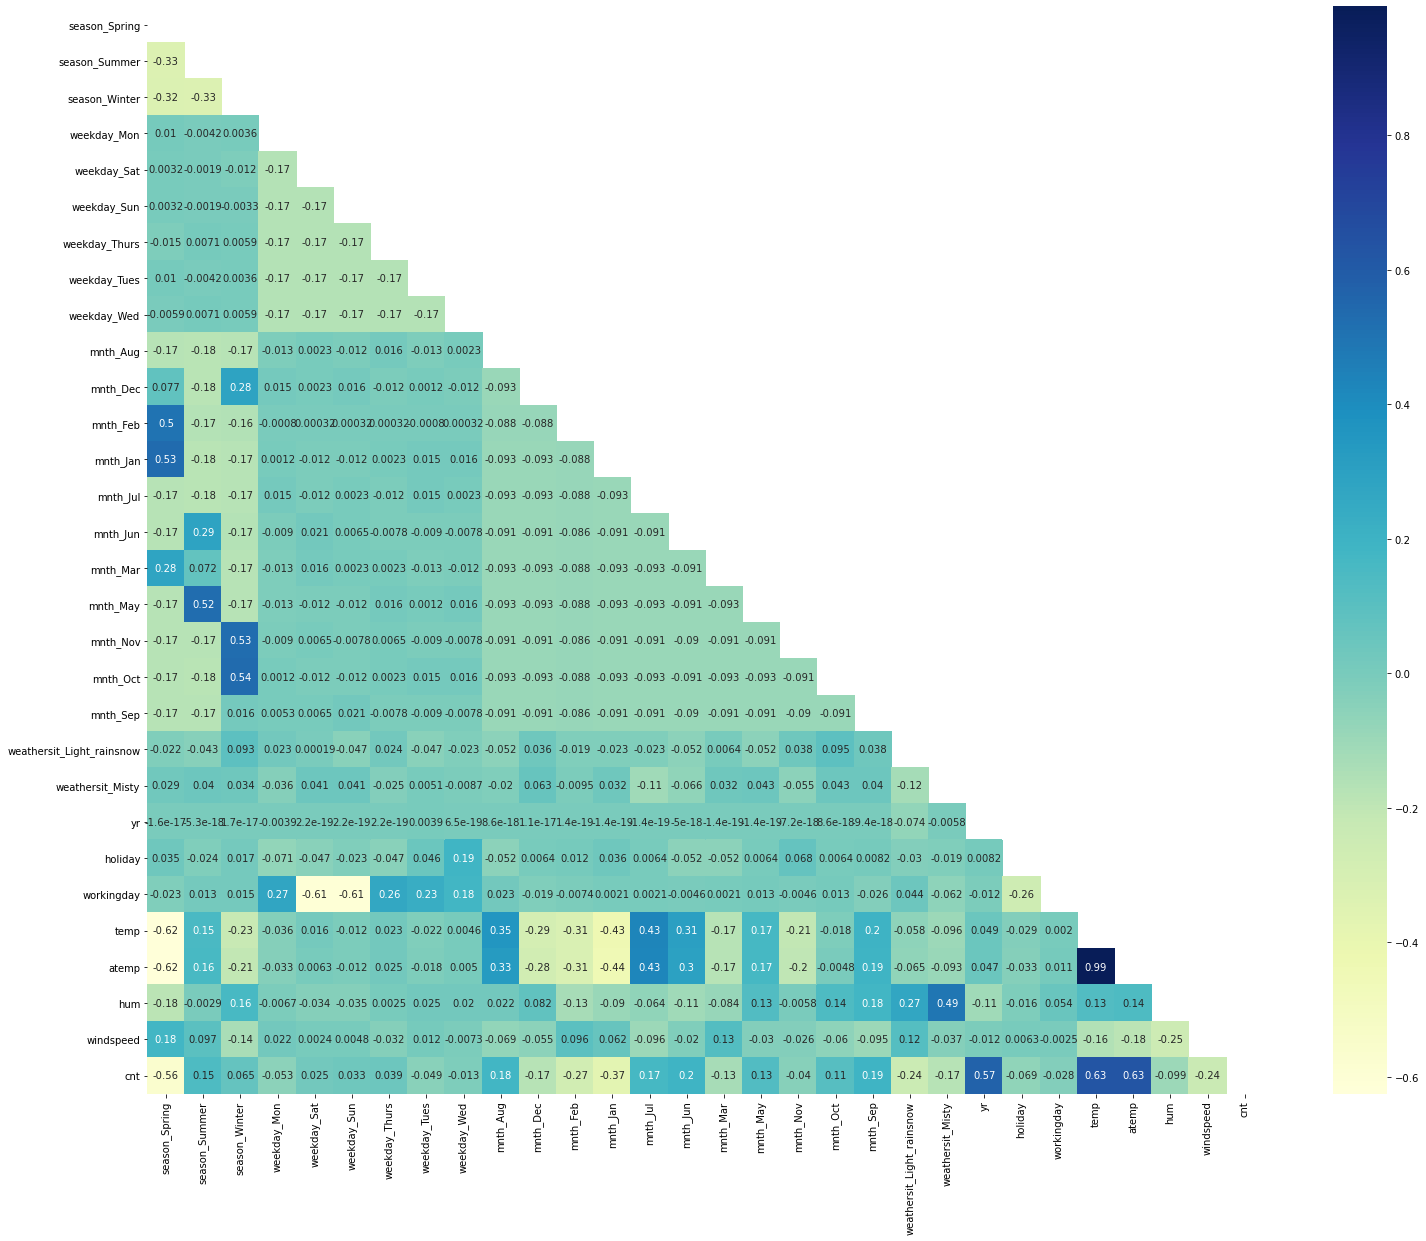

In [49]:
## Let's check the correlation Matrix of all variables of "df_bike"
corr = df_bike.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='YlGnBu', annot = True)

plt.show()

##### Inference:
##### There is multi-colinearity between the variables. We need to consider the factors when developing the model.

- temp and atemp has very high correlation value of 0.99. This suggest, we can use only one of these two variables
- workingday variable has high negative correlation with Sat & Sun (where workingday =0)
- Spring is negatively correlated with cnt
- temp, atemp and yr has strong correlation with cnt
- misty weather and humidity has correlation
- various months and corresponding weather has correlation

## Step-5 Building the Model

### 5.1 Dividing into X_train and y_train

In [50]:
df_train.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tues',
       'weekday_Wed', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sep', 'weathersit_Light_rainsnow', 'weathersit_Misty', 'yr',
       'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [51]:
# Splitting the Data into X and y train
y_train =df_train.pop("cnt")
X_train =df_train

In [52]:
X_train.head()

,season_Spring,season_Summer,season_Winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,mnth_Aug,...,mnth_Sep,weathersit_Light_rainsnow,weathersit_Misty,yr,holiday,workingday,temp,atemp,hum,windspeed
653,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794
576,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686
426,1,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342
728,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106
482,0,1,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475


In [53]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

### 5.2 Recursive Feature Elimination
##### RFE is an efficient approach for eliminating features from a training dataset for feature selection.

In [54]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

#### Using RFE we will select top 15 features which mostly describe our dependent/target variables

In [55]:
# Running RFE with the output number of the variable equal to 15
lr_estimator = LinearRegression()
rfe = RFE(lr_estimator,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)

In [56]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 5),
 ('weekday_Thurs', False, 13),
 ('weekday_Tues', False, 8),
 ('weekday_Wed', False, 11),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 7),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weathersit_Light_rainsnow', True, 1),
 ('weathersit_Misty', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [57]:
# storing the selected 15 variables in Selected Features list
selected_features  = X_train.columns[rfe.support_]
selected_features 

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Dec',
       'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weathersit_Light_rainsnow', 'weathersit_Misty', 'yr', 'holiday',
       'temp', 'hum', 'windspeed'],
      dtype='object')

In [58]:
# checking which columns have been eliminated features
elinimate_features = X_train.columns[~rfe.support_]
elinimate_features

Index(['weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Tues', 'weekday_Wed', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Oct', 'workingday', 'atemp'],
      dtype='object')

In [59]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[selected_features]

In [60]:
X_train_rfe.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Dec',
       'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weathersit_Light_rainsnow', 'weathersit_Misty', 'yr', 'holiday',
       'temp', 'hum', 'windspeed'],
      dtype='object')

### 5.3 Model Building Using stats model

### 5.3.1 Model_1

In [61]:
# Calculating VIF 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,30.94
12,temp,17.80
14,windspeed,4.72
0,season_Spring,4.37
2,season_Winter,4.06
1,season_Summer,2.81
9,weathersit_Misty,2.32
10,yr,2.09
6,mnth_Nov,1.83
4,mnth_Jan,1.75


In [62]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Fri, 11 Dec 2020   Prob (F-statistic):          3.34e-189
Time:                        20:42:44   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [63]:
features = X_train_rfe.drop(['hum'], axis = 1)

> Dropping hum as Vif value is high and P-value is low

### 5.3.2 Model_2

In [64]:
# Calculating VIF 
vif = pd.DataFrame()
vif['Features'] = features.columns
vif['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,5.17
13,windspeed,4.67
2,season_Winter,2.94
0,season_Spring,2.89
1,season_Summer,2.23
10,yr,2.07
6,mnth_Nov,1.80
4,mnth_Jan,1.66
5,mnth_Jul,1.59
9,weathersit_Misty,1.56


In [65]:
# Add a constant
X_train_lm2 = sm.add_constant(features)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Fri, 11 Dec 2020   Prob (F-statistic):          1.57e-186
Time:                        20:42:45   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [66]:
features = features.drop(['season_Summer'], axis = 1)

> Dropping season_Summer as Vif value is low and P-value is High among all the variable in the model

### 5.3.3 Model_3

In [67]:
# Calculating VIF 
vif = pd.DataFrame()
vif['Features'] = features.columns
vif['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,4.67
12,windspeed,4.05
1,season_Winter,2.54
0,season_Spring,2.36
9,yr,2.06
5,mnth_Nov,1.80
3,mnth_Jan,1.65
8,weathersit_Misty,1.53
2,mnth_Dec,1.46
4,mnth_Jul,1.36


In [68]:
# Add a constant
X_train_lm3 = sm.add_constant(features)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Fri, 11 Dec 2020   Prob (F-statistic):          1.08e-186
Time:                        20:42:45   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [69]:
features = features.drop(['holiday'], axis = 1)

> Dropping holiday as Vif value is low and P-value is low

### 5.3.4 Model_4

In [70]:
# Calculating VIF 
vif = pd.DataFrame()
vif['Features'] = features.columns
vif['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,4.66
11,windspeed,4.05
1,season_Winter,2.54
0,season_Spring,2.35
9,yr,2.06
5,mnth_Nov,1.77
3,mnth_Jan,1.65
8,weathersit_Misty,1.53
2,mnth_Dec,1.46
4,mnth_Jul,1.36


In [71]:
# Add a constant
X_train_lm4 = sm.add_constant(features)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.7
Date:                Fri, 11 Dec 2020   Prob (F-statistic):          2.97e-185
Time:                        20:42:45   Log-Likelihood:                 497.03
No. Observations:                 510   AIC:                            -968.1
Df Residuals:                     497   BIC:                            -913.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [72]:
features = features.drop(['mnth_Dec'], axis = 1) # low Vif and high p value

> Dropping mnth_Dec as Vif value is Low and P-value is High

### 5.3.5 Model_5

In [73]:
# Calculating VIF 
vif = pd.DataFrame()
vif['Features'] = features.columns
vif['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,4.65
10,windspeed,4.04
0,season_Spring,2.24
8,yr,2.06
1,season_Winter,1.92
2,mnth_Jan,1.60
4,mnth_Nov,1.56
7,weathersit_Misty,1.53
3,mnth_Jul,1.36
5,mnth_Sep,1.20


In [74]:
# Add a constant
X_train_lm5 = sm.add_constant(features)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.4
Date:                Fri, 11 Dec 2020   Prob (F-statistic):          1.40e-184
Time:                        20:42:45   Log-Likelihood:                 492.63
No. Observations:                 510   AIC:                            -961.3
Df Residuals:                     498   BIC:                            -910.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [75]:
features = features.drop(['mnth_Nov'], axis = 1)

> Dropping mnth_Nov as Vif value is low and P-value is High

### 5.3.6 Model_6

In [76]:
# Calculating VIF 
vif = pd.DataFrame()
vif['Features'] = features.columns
vif['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,4.63
9,windspeed,4.00
0,season_Spring,2.24
7,yr,2.06
2,mnth_Jan,1.60
6,weathersit_Misty,1.52
1,season_Winter,1.38
3,mnth_Jul,1.36
4,mnth_Sep,1.20
5,weathersit_Light_rainsnow,1.08


In [77]:
# Add a constant
X_train_lm6 = sm.add_constant(features)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     243.8
Date:                Fri, 11 Dec 2020   Prob (F-statistic):          6.73e-185
Time:                        20:42:45   Log-Likelihood:                 490.53
No. Observations:                 510   AIC:                            -959.1
Df Residuals:                     499   BIC:                            -912.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [78]:
features = features.drop(['mnth_Jan'], axis = 1)

> Dropping mnth_Jan as Vif value is low and P-value is High

In [79]:
# Calculating VIF 
vif = pd.DataFrame()
vif['Features'] = features.columns
vif['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,temp,4.60
8,windspeed,4.00
6,yr,2.06
0,season_Spring,1.63
5,weathersit_Misty,1.51
1,season_Winter,1.38
2,mnth_Jul,1.35
3,mnth_Sep,1.20
4,weathersit_Light_rainsnow,1.08


In [80]:
# Add a constant
X_train_lm7 = sm.add_constant(features)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

# Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     267.7
Date:                Fri, 11 Dec 2020   Prob (F-statistic):          6.95e-185
Time:                        20:42:45   Log-Likelihood:                 487.60
No. Observations:                 510   AIC:                            -955.2
Df Residuals:                     500   BIC:                            -912.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [81]:
features = features.drop(['mnth_Sep'], axis = 1)

> Dropping mnth_Sep as Vif value is Low and P-value is High

In [82]:
# Calculating VIF 
vif = pd.DataFrame()
vif['Features'] = features.columns
vif['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,temp,4.19
7,windspeed,3.95
5,yr,2.06
0,season_Spring,1.63
4,weathersit_Misty,1.51
1,season_Winter,1.38
2,mnth_Jul,1.31
3,weathersit_Light_rainsnow,1.08


In [83]:
# Add a constant
X_train_lm8 = sm.add_constant(features)

# Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

# Print a summary of the linear regression model obtained
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     293.7
Date:                Fri, 11 Dec 2020   Prob (F-statistic):          1.04e-183
Time:                        20:42:46   Log-Likelihood:                 481.89
No. Observations:                 510   AIC:                            -945.8
Df Residuals:                     501   BIC:                            -907.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### 5.4 Final Model

In [84]:
final_model = sm.OLS(y_train, X_train_lm8).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     293.7
Date:                Fri, 11 Dec 2020   Prob (F-statistic):          1.04e-183
Time:                        20:42:46   Log-Likelihood:                 481.89
No. Observations:                 510   AIC:                            -945.8
Df Residuals:                     501   BIC:                            -907.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2491      0.024     10.177      0.000       0.201       0.297
season_Spring                -0.1148      0.016     -7.363      0.000      -0.145      -0.084
season_Winter                 0.0437      0.013      3.442      0.001       0.019       0.069
mnth_Jul                     -0.0829      0.018     -4.720      0.000      -0.117      -0.048
weathersit_Light_rainsnow    -0.2774      0.025    -10.911      0.000      -0.327      -0.227
weathersit_Misty             -0.0779      0.009     -8.637      0.000      -0.096      -0.060
yr                            0.2339      0.008     27.568      0.000       0.217       0.251
temp                          0.4688      0.031     15.173      0.000       0.408       0.530
windspeed                    -0.1492      0.026     -5.823      0.000      -0.200      -0.099
==============================================================================
Omnibus:                       66.438   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.765
Skew:                          -0.653   Prob(JB):                     1.85e-38
Kurtosis:                       5.543   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion:
- 8 features have been selected.
- All the features are statistically significant [low p-value]
- The model over is a good fit with Prob (F-statistic): 1.04e-183
- The model explains 82.4% variability in the training data. Adjusted R-square being 82.1%


## Step-6: Final Model

### 6.1 Hypothesis Testing :
##### Hypothesis Testing States that
##### H0:B1=B2=...=Bn=0
##### H1: at least one Bi!=0


In [85]:
lr8.params

const                        0.249059
season_Spring               -0.114753
season_Winter                0.043695
mnth_Jul                    -0.082947
weathersit_Light_rainsnow   -0.277400
weathersit_Misty            -0.077897
yr                           0.233928
temp                         0.468834
windspeed                   -0.149247
dtype: float64

##### Conclusion: From the above summary of parameters we can conclude that all the coefficients are not equal to Zero, Hence we can conclude that we Reject the NULL HYPOTHESIS

### 6.2 F-Staitsics :
##### F-Statistics is used for testing the overall significance of the Model.
- F-statistic:                     293.7
- Prob (F-statistic):          1.04e-183

##### Conclusion: The F-Statistics value of 293.7 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

### 6.3 Best Fit Equation :
Total Users ( cnt ) =  0.249059 +  0.043695 ( Season Winter ) + 0.233928 ( year ) + 0.468834( temparture )-0.114753(Season Spring)-0.082947( Month July)-0.277400 ( Weathersit Light Rain Snow)-0.077897( weathersit Misty )-0.149247 (windspeed)

<!-- ## Step-7 Prediction and evaluation on the test -->

## Step-7: Model Validation

#### Validating the assumption of Linear Regression Model :

- Linear Relationship
- Homoscedasticity
- Absence of Multicollinearity
- No Autocorrelation in residuals.
- Normality of Errors

### 7.1 Linear Relationship

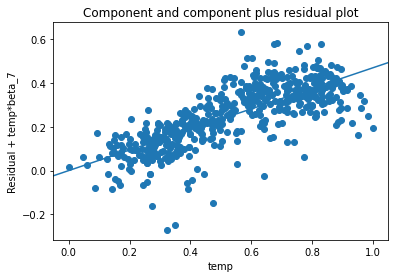

In [86]:
sm.graphics.plot_ccpr(lr8, 'temp')
plt.show()

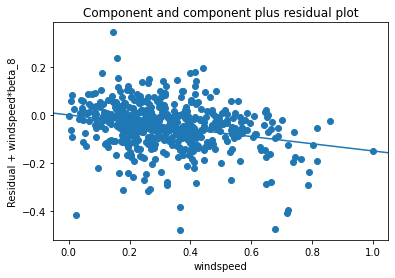

In [87]:
sm.graphics.plot_ccpr(lr8, 'windspeed')
plt.show()

#### Inference:
- The above plots represents the relationship between the model and the predictor variables. As we can see, linear relationship in the model

### 7.2 Homoscedasticity

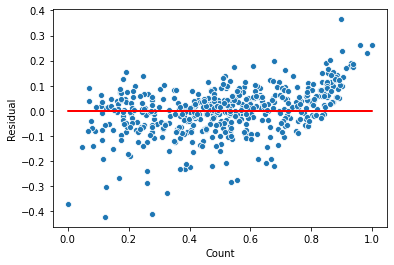

In [88]:
y_train_pred = lr8.predict(X_train_lm8)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### Inference:
- There is no visible pattern in residual values, thus homoscedacity in the model

### 7.3 Absence of Multicollinearity

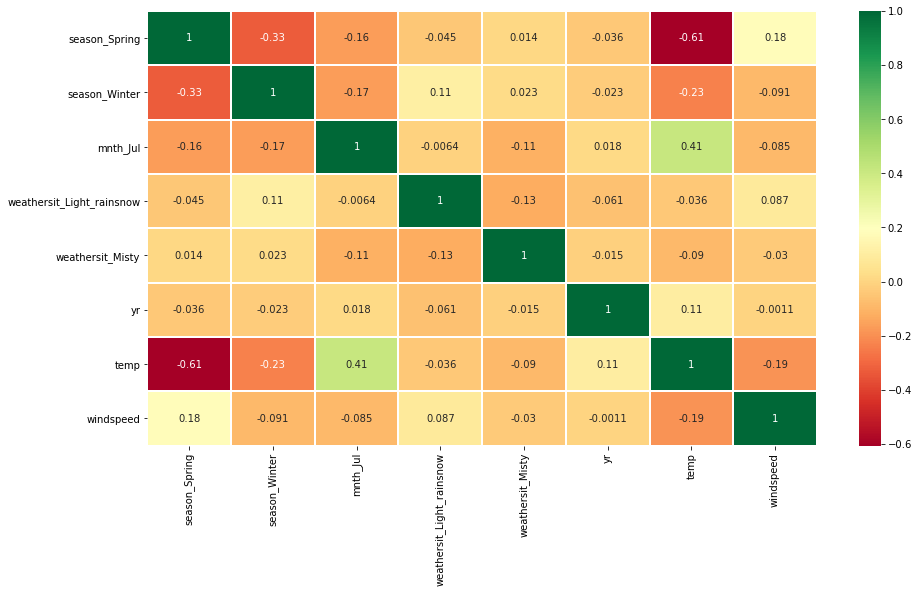

In [89]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(features.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [90]:
# Calculating VIF 
vif = pd.DataFrame()
vif['Features'] = features.columns
vif['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,temp,4.19
7,windspeed,3.95
5,yr,2.06
0,season_Spring,1.63
4,weathersit_Misty,1.51
1,season_Winter,1.38
2,mnth_Jul,1.31
3,weathersit_Light_rainsnow,1.08


##### Inference:
- All the predictor variables have VIF value less than 5. So we can consider that there is insignificant multicolinearity among the predictor variables.

### 7.4 Independence of residuals
### To check Independence of residuals/No Autocorrelation in residuals we can Use Durbin-Watson Test. The test output values will be between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables.
- DW = 2 would be the ideal case here (no autocorrelation)
- 0 < DW < 2 -> positive autocorrelation
- 2 < DW < 4 -> negative autocorrelation

##### From Our final Model Summary
- Durbin-Watson: 1.932

##### Inference:
- Our model's Durbin-Watson is 1.932 which is less then 2. Hence we can conclude that there is almost no autocorrelation.

### 7.5 Normality of error


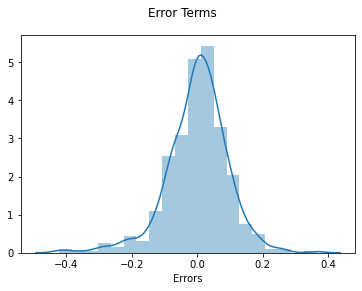

In [91]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

##### Inference: 
-  Based on the histogram, we can conclude that error terms are following a normal distribution

## Step-8: Prediction Using final Model

### 8.1 Scaling Test dataframe

In [92]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,season_Spring,season_Summer,season_Winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,mnth_Aug,...,weathersit_Light_rainsnow,weathersit_Misty,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706
535,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382
221,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029


In [93]:
df_test.describe()

,season_Spring,season_Summer,season_Winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,mnth_Aug,...,weathersit_Light_rainsnow,weathersit_Misty,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.059361,...,0.027397,0.319635,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.236840,...,0.163612,0.467403,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


### 8.2 Dividing X_test and y_test

In [94]:
y_test = df_test.pop('cnt')
X_test = df_test

In [95]:
test_features=features.columns

X_test=X_test[test_features]

In [96]:
# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)

X_test_lm8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   const                      219 non-null    float64
 1   season_Spring              219 non-null    uint8  
 2   season_Winter              219 non-null    uint8  
 3   mnth_Jul                   219 non-null    uint8  
 4   weathersit_Light_rainsnow  219 non-null    uint8  
 5   weathersit_Misty           219 non-null    uint8  
 6   yr                         219 non-null    int64  
 7   temp                       219 non-null    float64
 8   windspeed                  219 non-null    float64
dtypes: float64(3), int64(1), uint8(5)
memory usage: 9.6 KB


In [97]:
# Making predictions using the final model

y_pred = lr8.predict(X_test_lm8)

## Step-9: Model Evaluation

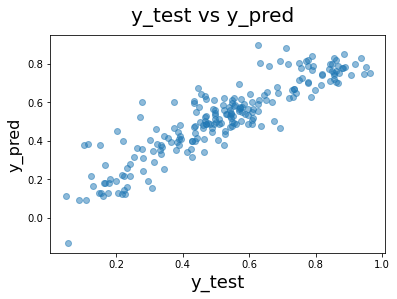

In [98]:
#Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()


##### Inference:
- Y_test and y_pred show linearity in the above graph which show the resemblance in both the parameter

### 9.1 R2 Score Calculation for bike_test dataframe

In [99]:
# R2 Value Calculation for test 
r2 = round(r2_score(y_test, y_pred),4)
r2

0.8041

### 9.1 Adjusted R2 Score Calculation for Test dataframe

In [100]:
# Adjusted R2 Value Calculation for test dataframe
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2


0.7966

In [101]:
from sklearn import metrics
print("Mean Absolute Error :", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error :", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error : 0.07291789816802845
Mean Squared Error : 0.00930371422517089
Root Mean Squared Error : 0.09645576304799465


## Step 10: Model Outcome Summary

#### As per the final model, the top 3 predictor variables that influences bike booking are:

- Temperature (Temp):A coefficient value of " 0.468834" indicated that a temperature has significant impact on business.
    
- Light Rain & Snow (weathersit_Light_rainsnow): A coefficient value of "-0.277400" indicated that the light snow and rain decrease people from renting out bikes
    
- Year (yr):A coefficient value of "0.233928" indicated that a year wise demand of rental bikes are increasing


## Step 11: Conclusion

- The value of Train is R-squared:0.824 and Adj. R-squared:0.821 and the value of test is R-squared:0.8041 and Adj. R-squared:0.7966 they are in close proximity,Which show that model is appropriate for the given dataset.

- Mean Absolute Error : 0.07291789816802845,Mean Squared Error : 0.00930371422517089 and Root Mean Squared Error : 0.09645576304799465 which show the model has less  error. 

- Model show normal distribution of error.

- All the predictor variables have VIF value less than 5. So we can consider that there is insignificant multicolinearity among the predictor variables.

- Model Show linearity.

- F-Statistics is used for testing the overall significance of the Model. F-statistic: 293.7 and Prob (F-statistic): 1.04e-183The F-Statistics value of 293.7 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

-  Best Fit Equation :Total Users ( cnt ) =  0.249059 +  0.043695 ( Season Winter ) + 0.233928 ( year ) + 0.468834( temparture )-0.114753(Season Spring)-0.082947( Month July)-0.277400 ( Weathersit Light Rain Snow)-0.077897( weathersit Misty )-0.149247 (windspeed)

- Model majorly depends on Temperature (Temp),Light Rain & Snow (weathersit_Light_rainsnow) and Year (yr)

- As per Final model outcome we can conclude that these three variables are one of most important parameter for Bike rental booking. It an be  recommended to give utmost importance to these three variables while planning to achieve maximum bike rental booking.

- As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability and Advertisement to be increased.